# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [609]:
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [610]:
# load imdb dataset as pandas dataframe
df=pd.DataFrame(pd.read_csv(csv_url22))
imdb_df = pd.read_csv("D:\programs\Python\Jupyter\data\imdb_1000.csv")

In [611]:
# show first 5 rows of imdb_df
df[:5]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [612]:
# load bikes dataset as pandas dataframe
df1 = pd.read_csv("D:\programs\Python\Jupyter\data\\bikes.csv", sep=";", parse_dates=['Date'], dayfirst=True, index_col='Date')

In [613]:
# show first 3 rows of bikes_df
df1[:3]

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [614]:
# list columns of imdb_df
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [615]:
# what are the datatypes of values in columns
df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [616]:
# list first 5 movie titles
b=df.iloc[:5]
(b['title'])

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [617]:
# show only movie title and genre
df[['title', 'genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [618]:
# show the type of duration column
df.duration.dtype


dtype('int64')

In [619]:
# show duration values of movies as numpy arrays
import numpy as np
X=np.array([df.duration])
X

array([[142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
        142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
        175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
        109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
        125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
        116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
        229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
        108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
        143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
         81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
        130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
        180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
        178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
        100, 135, 105,  94, 140,  83,  95,  98, 143

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [640]:
# convert all the movie titles to uppercase
to_upper = lambda x: x.upper()
imdb_df['title'].apply(to_upper)
df

,star_rating,title,content_rating,genre,duration,actors_list,mean_duration
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",122.298387
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",122.298387
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",122.298387
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",126.485294
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",122.298387
...,...,...,...,...,...,...,...
974,7.4,TOOTSIE,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",107.602564
975,7.4,BACK TO THE FUTURE PART III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",134.840000
976,7.4,MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",126.485294
977,7.4,POLTERGEIST,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",102.517241


## Plotting a column

Use ``.plot()`` function!

<AxesSubplot:xlabel='Date'>

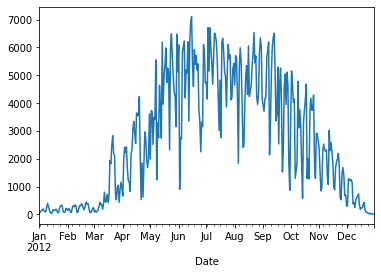

In [621]:
# plot the bikers travelling to Berri1 over the year
df1['Berri1'].plot()

<AxesSubplot:xlabel='Date'>

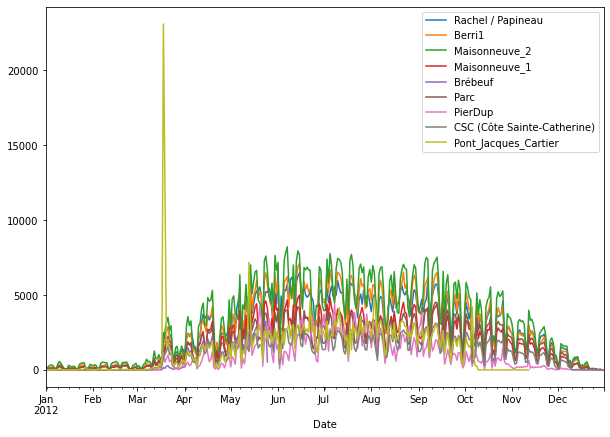

In [622]:
# plot all the columns of bikes_df
df1.plot(figsize=(10,7))

## Value counts

Get count of unique values in a particular column/Series.

In [623]:
# what are the unique genre in imdb_df
df['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

<AxesSubplot:>

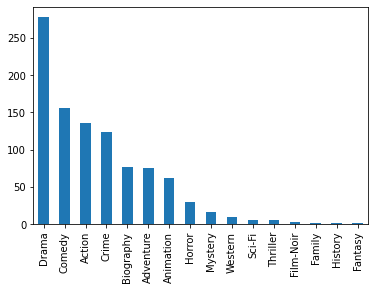

In [624]:
# plotting value counts of unique genres as a bar chart
df['genre'].value_counts().plot.bar()

<AxesSubplot:ylabel='genre'>

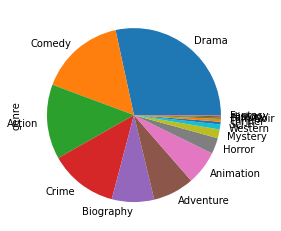

In [625]:
# plotting value counts of unique genres as a pie chart
df['genre'].value_counts().plot.pie()

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [626]:
# show index of bikes_df
df1.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [627]:
# get row for date 2012-01-01
df1.loc['2012-01-01']

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                          5.0
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier            27.0
Name: 2012-01-01 00:00:00, dtype: object

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [628]:
# show 11th row of imdb_df using iloc
df.iloc[10]

star_rating                                                     8.8
title             THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING
content_rating                                                PG-13
genre                                                     Adventure
duration                                                        178
actors_list       [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
Name: 10, dtype: object

## Selecting rows where column has a particular value

In [629]:
# select only those movies where genre is adventure
df[df['genre'] == 'Adventure'].head()

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,THE LORD OF THE RINGS: THE RETURN OF THE KING,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,THE LORD OF THE RINGS: THE TWO TOWERS,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,INTERSTELLAR,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,BACK TO THE FUTURE,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."


In [630]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
mov = (df['star_rating'] > 8) & (df['duration'] > 130)
df[mov]['genre'].value_counts()

Drama        36
Action       20
Adventure    17
Crime        13
Biography    12
Western       6
Comedy        6
Mystery       3
Horror        1
Animation     1
Name: genre, dtype: int64

## Adding a new column to DataFrame

In [631]:
# add a weekday column to bikes_df

## Deleting an existing column from DataFrame

In [632]:
# remove column 'Unnamed: 1' from bikes_df
df1.drop('Unnamed: 1', axis=1, inplace=True)

## Deleting a row in DataFrame

In [633]:
# remove row no. 1 from bikes_df
df.drop(df.index[0]).head()

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 ANGRY MEN,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [634]:
# group imdb_df by movie genres
g=df.groupby('genre')

In [635]:
# get crime movies group
g.get_group('Crime').head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,CITY OF GOD,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."


In [636]:
# get mean of movie durations for each group
g.aggregate('mean')

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


In [637]:
# change duration of all movies in a particular genre to mean duration of the group
df['mean_duration'] = g['duration'].transform(lambda x:x.mean())

In [638]:
# drop groups/genres that do not have average movie duration greater than 120.
new_df = g.filter(lambda x: x['duration'].mean() > 120)

In [639]:
# group weekday wise bikers count
grp_weekday = df1.groupby('weekday')

KeyError: 'weekday'

In [ ]:
# get weekday wise biker count
sum_biker= grp_weekday.aggregate(sum)

NameError: name 'grp_weekday' is not defined

In [ ]:
# plot weekday wise biker count for 'Berri1'
sum_biker['Berri1'].plot.bar()

NameError: name 'sum_biker' is not defined

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)